# Imports

In [20]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Datetime
import datetime as datetime

In [2]:
# https://github.com/vera-institute/jail-population-data

vera_df = pd.read_csv('https://raw.githubusercontent.com/vera-institute/jail-population-data/master/jail_population.csv')
vera_df.head()

,fips,date,jail_population,county_name,state_name,urbanicity,reporting_jurisdictions,resident_population,jail_incarceration_rate_per_100k
0,1001,2020-01-01,185,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,331.1
1,1001,2020-01-02,184,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,329.3
2,1001,2020-01-03,178,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,318.6
3,1001,2020-01-04,177,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,316.8
4,1001,2020-01-05,183,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,327.6


# EDA

In [3]:
vera_df.shape

(179499, 9)

In [4]:
vera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179499 entries, 0 to 179498
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fips                              179499 non-null  int64  
 1   date                              179499 non-null  object 
 2   jail_population                   179499 non-null  int64  
 3   county_name                       179423 non-null  object 
 4   state_name                        179353 non-null  object 
 5   urbanicity                        179423 non-null  object 
 6   reporting_jurisdictions           177469 non-null  object 
 7   resident_population               179423 non-null  float64
 8   jail_incarceration_rate_per_100k  179423 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 12.3+ MB


In [5]:
vera_df['date']=pd.to_datetime(vera_df['date'])
vera_df.head()

,fips,date,jail_population,county_name,state_name,urbanicity,reporting_jurisdictions,resident_population,jail_incarceration_rate_per_100k
0,1001,2020-01-01,185,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,331.1
1,1001,2020-01-02,184,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,329.3
2,1001,2020-01-03,178,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,318.6
3,1001,2020-01-04,177,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,316.8
4,1001,2020-01-05,183,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,327.6


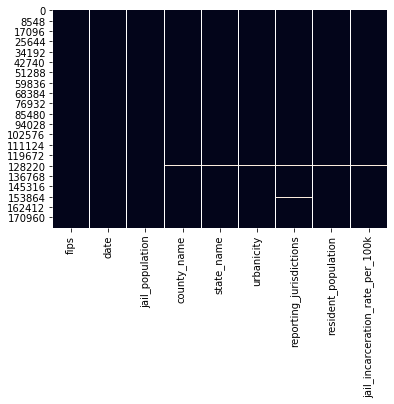

In [6]:
# Check for null values

sns.heatmap(vera_df.isnull(), cbar=False)

In [7]:
vera_df.columns

Index(['fips', 'date', 'jail_population', 'county_name', 'state_name',
       'urbanicity', 'reporting_jurisdictions', 'resident_population',
       'jail_incarceration_rate_per_100k'],
      dtype='object')

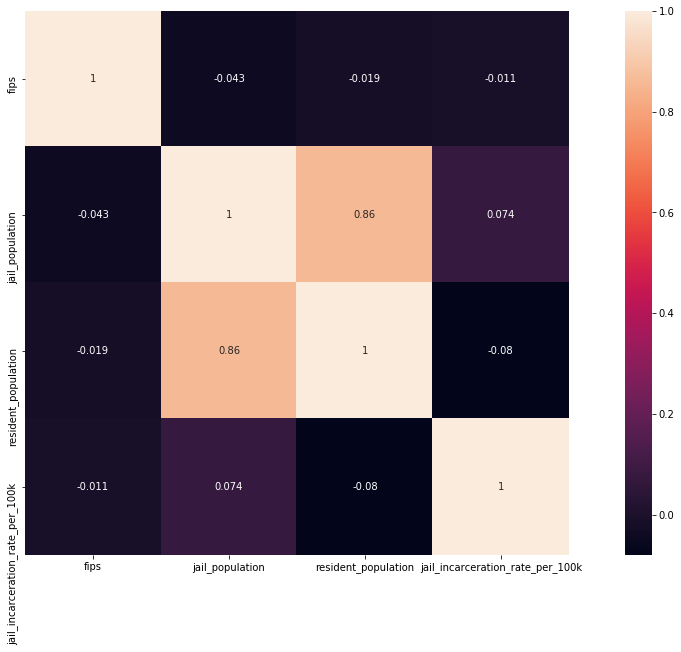

In [8]:
# Create heatmap

corrmat = vera_df[['fips', 'jail_population', 'resident_population',
       'jail_incarceration_rate_per_100k'\
             ]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True)

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


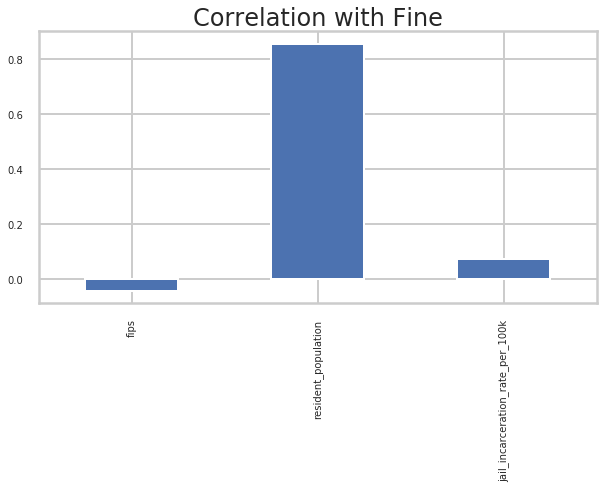

In [9]:
X = vera_df.drop(['jail_population'],axis=1)
y = vera_df['jail_population']

sns.set(style="whitegrid", palette=("deep"),font='calibri')
sns.set_context("poster")

X.corrwith(vera_df['jail_population']).plot.bar(figsize = (10, 5), title ="Correlation with Fine", fontsize = 10,
rot = 90, grid = True,)

In [10]:
#Round to the hour
vera_df['week'] = vera_df['date'].dt.strftime('%W')
vera_df.head()

,fips,date,jail_population,county_name,state_name,urbanicity,reporting_jurisdictions,resident_population,jail_incarceration_rate_per_100k,week
0,1001,2020-01-01,185,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,331.1,00
1,1001,2020-01-02,184,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,329.3,00
2,1001,2020-01-03,178,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,318.6,00
3,1001,2020-01-04,177,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,316.8,00
4,1001,2020-01-05,183,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,327.6,00


No handles with labels found to put in legend.


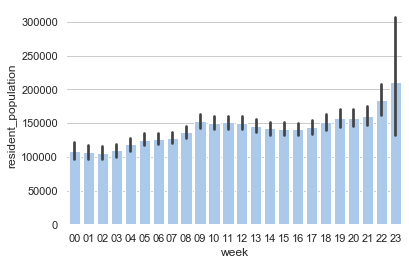

In [15]:
sns.set(style="whitegrid")

# Plot the total pop
sns.set_color_codes("pastel")
sns.barplot(x="week", y="resident_population", data=vera_df,
            label="Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Incarceration")
sns.despine(left=True, bottom=True)

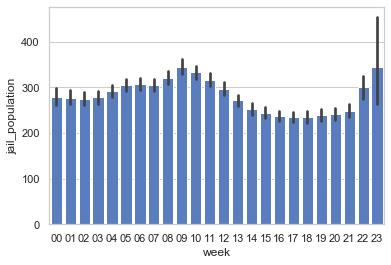

In [13]:
# Plot the prison pop
sns.set_color_codes("muted")
sns.barplot(x="week", y="jail_population", data=vera_df,
            label="Total", color="b")

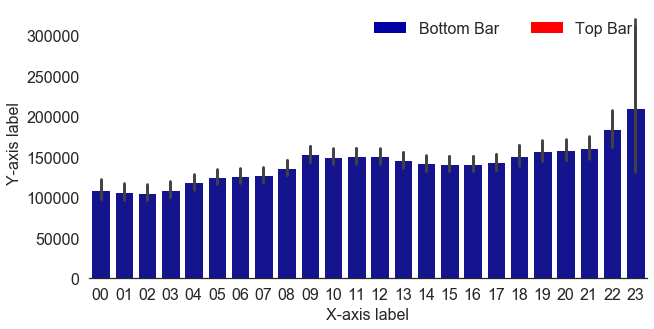

In [23]:
#Read in data & create total column
stacked_bar_data = vera_df
stacked_bar_data["total"] = stacked_bar_data.resident_population + stacked_bar_data.jail_population

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 5)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.week, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.week, y = stacked_bar_data.resident_population, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

# Feature Engineering

In [12]:
#look into date issue